In [22]:
### Trading ML is a software to track option market and advise the strategy 
### according to several features including volume trend, open interest trend, delta
### it also back trace option strategy performance via stored data

In [23]:
import requests as requests
import pprint
import numpy as np
import matplotlib.pyplot as plt
from datetime import date as date
from finnhub_api import Finnapi as Finnapi

In [24]:
def any_non_type(item, list_of_attr):
    for l in list_of_attr:
        if (item[l] is None):
            return True
    return False

In [25]:
def convertAttrToFloat(item, list_of_attr):
    r = item
    for l in list_of_attr:
        r[l] = np.float(item[l])
    return r

In [26]:
def filter_options(res, expiration_date, option_type, strike_low, strike_high, openInterest_min, volume_min):
    s_list = [] 
    oi_list = []
    v_list = []
    p_list = []
    b_list = []
    a_list = []
    for item in res['data']:
        if (expiration_date == None or item['expirationDate'] == expiration_date):
            ## option_type can be 'CALL' or 'PUT'
            ops = item['options'][option_type]
            for o in ops:
                if (any_non_type(o, ['strike', 'volume', 'openInterest', 'bid', 'ask', 'lastPrice'])):
                    continue
                o = convertAttrToFloat(o, ['strike', 'volume', 'openInterest', 'bid', 'ask', 'lastPrice'])
                s = np.float(o['strike']) 
                if (( s>= strike_low) and s <= strike_high and
                    o['openInterest'] > openInterest_min and  o['volume'] > volume_min):
        
                    s_list.append(s)
                    oi_list.append(o['openInterest'])
                    v_list.append(o['volume'])
                    p_list.append(o['lastPrice'])
                    b_list.append(o['bid'])
                    a_list.append(o['ask'])
    return(s_list, oi_list, v_list, p_list, b_list, a_list)
    
        

In [27]:
f = Finnapi('bmrl2rnrh5rakeigdikg', 2)
f.curr_symbol = 'AAPL'

In [28]:
response = f.getOptionChain()

Getting option chain for symbol AAPL


In [29]:
print(response)

{'code': 'AAPL', 'exchange': 'US', 'data': [{'expirationDate': '2019-11-01', 'options': {'CALL': [{'contractName': 'AAPL191101C00150000', 'contractSize': 'REGULAR', 'currency': 'USD', 'type': 'CALL', 'inTheMoney': 'FALSE', 'lastTradeDateTime': '2019-10-30 14:23:48', 'expirationDate': '2019-11-01', 'strike': '150.0000', 'lastPrice': '97.6000', 'bid': '98.8500', 'ask': '99.2000', 'change': '2.6500', 'changePercent': '0.0279', 'volume': 1, 'openInterest': 16, 'impliedVolatility': '0.0019', 'delta': '1.0000', 'gamma': '0.0000', 'theta': '-0.0094', 'vega': '0.0000', 'rho': '0.0164', 'theoretical': '99.0876', 'intrinsicValue': '0.0000', 'timeValue': '0.0000', 'updatedAt': '2019-10-30 19:34:30'}, {'contractName': 'AAPL191101C00155000', 'contractSize': 'REGULAR', 'currency': 'USD', 'type': 'CALL', 'inTheMoney': 'FALSE', 'lastTradeDateTime': '2019-10-24 10:45:44', 'expirationDate': '2019-11-01', 'strike': '155.0000', 'lastPrice': '89.9500', 'bid': '93.9000', 'ask': '94.2000', 'change': '2.2500'

In [36]:
(s_list, oi_list, v_list, p_list, b_list, a_list) = filter_options(response, '2019-11-15', 'CALL', 220, 225, 0, 0)

2019-10-31


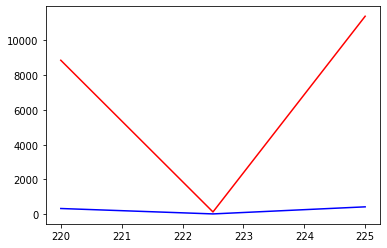

In [37]:
print(date.today())
plt.plot(np.array(s_list), np.array(oi_list), color='r')
plt.plot(np.array(s_list), np.array(v_list), color='b')

In [38]:
(s_list, oi_list, v_list,p_list, b_list, a_list) = filter_options(response, '2019-11-15', 'CALL', 210, 239, 100, 0)
(s_list_f, oi_list_f, v_list_f,p_list_f, b_list_f, a_list_f) = filter_options(response, '2019-12-20', 'CALL', 219, 230, 100, 0)

[210.0, 215.0, 220.0, 222.5, 225.0, 227.5, 230.0, 232.5, 235.0, 237.5]


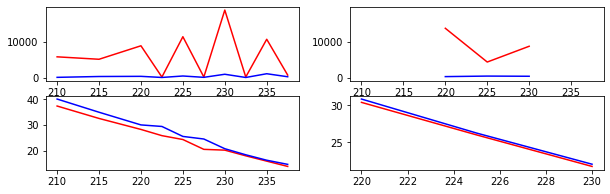

In [39]:

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222, sharex=ax, sharey=ax)
ax3 = f.add_subplot(2,2,3)
ax4 = f.add_subplot(2,2,4)
print(s_list)
ax.plot(np.array(s_list), np.array(oi_list), color='r')
ax.plot(np.array(s_list), np.array(v_list), color='b')
ax2.plot(np.array(s_list_f), np.array(oi_list_f), color='r')
ax2.plot(np.array(s_list_f), np.array(v_list_f), color='b')
ax3.plot(np.array(s_list), np.array(b_list), color='r')
ax3.plot(np.array(s_list), np.array(a_list), color='b')
ax4.plot(np.array(s_list_f), np.array(b_list_f), color='r')
ax4.plot(np.array(s_list_f), np.array(a_list_f), color='b')
